# FFR110 Problem set 3

Oskar Palmgren, 20010529, oskarpal@chalmers.se

Oscar Rosman, 19991215, oscarros@chalmers.se

___

## Task 1: Stochastic dynamics in large but finite populations

### a)

We have the equations for the deterministic SIS model:


$\frac{\text{d}I}{\text{d}t} = \frac{\alpha}{(S + I)}SI - \beta I$,

$\frac{\text{d}S}{\text{d}t} = -\frac{\alpha}{(S + I)}SI + \beta I$.

To simplify the dynamics we eliminate $S$ by substituting $S=N-I$:


$\Rightarrow \frac{\text{d}I}{\text{d}t} = \frac{\alpha}{(N - I) + I}(N - I)I - \beta I = \frac{\alpha}{N}(N - I)I - \beta I$



$\Rightarrow \frac{\text{d}(N - I)}{\text{d}t} = -\frac{\alpha}{(N - I) + I}(N - I)I + \beta I = -\frac{\alpha}{N}(N - I)I + \beta I = -\frac{\text{d}I}{\text{d}t}$ 



Both equations are the same...

Solve $\frac{\text{d}I}{\text{d}t}=0$

In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

In [21]:
I, N, alpha, beta = sp.symbols('I N alpha beta')

dIdt = (alpha/N)*(N-I)*I - beta*I

eq1 = sp.Eq(dIdt, 0)



steady_states = sp.solve(eq1, I)

print(steady_states)


[0, N*(alpha - beta)/alpha]


We find two steady states:

$I_1^*=0$

$I_2^*=N\frac{\alpha-\beta}{\alpha}$

Now check the stability through linear stability analysis around the steady states. We differentiate $\frac{\text{d}I}{\text{d}t}$ and insert $I^*$, $\frac{\text{d}\frac{\text{d}I}{\text{d}t}}{\text{d}I}(I^*)$

In [22]:

J = sp.diff(dIdt, I)

J_steady_state1 = sp.simplify(J.subs(I, steady_states[0]))

J_steady_state2 = sp.simplify(J.subs(I, steady_states[1]))


print([J_steady_state1, J_steady_state2])



[alpha - beta, -alpha + beta]


We get

$\frac{\text{d}\frac{\text{d}I}{\text{d}t}}{\text{d}I}(I_1^*) = \alpha - \beta$

$\frac{\text{d}\frac{\text{d}I}{\text{d}t}}{\text{d}I}(I_2^*) = \beta - \alpha$

So in order for $I_1^*$ to be stable, we have that $\alpha$ must be less than $\beta$. For $I_2^*$ to be stable we instead have $\alpha > \beta$. 


However, if $\alpha < \beta$, we find that $I_2^*=N\frac{\alpha-\beta}{\alpha}$ is negative which is not possible since $I$ is the population size of infectives. From the task we also know that both $\alpha$ and $\beta$ are positive constants. Therefore, the sole conditions for the parameters are $0 < \beta < \alpha$. This means that $I_1^*$ is unstable and $I_2^*$ is stable.

### b)

$P_n(t + \text{d}t) = P(t)_n + P_\text{\{influx\}} - P_\text{\{outflux\}} = P(t)_n + [\,b_{n-1}\rho_{n-1}(t) \text{d}t + d_{n+1}\rho_{n-1}(t)\text{d}t] - [(b_n + d_n)P_n(t) \text{d}t ]$

Infection rate: $b_n = \alpha n(1 - \frac{n}{N})$

Death rate: $d_n = \beta n$

We take small $\text{d}t$ limit, $\text{d}t \rightarrow 0$ to obtain:

$\frac{\text{d}P_n(t)}{\text{d}t} = b_{n-1} P_{n-1}(t) + d_{n+1}P_{n+1}(t) - (b_n + d_n) P_n(t)$

Now to derive the deterministic model from the stochastic one we assume in $N \rightarrow \infty$ that the expected value of I is obtained

Let $I := <n> = \sum_{n=0}^{\infty} nP_n(t)$

and $I^2 := <n^2>$ 

$\rightarrow \frac{\text{d}I}{\text{d}t} = \frac{\text{d}}{\text{d}t}\sum_{n=0}^{\infty}{n p_n(t)} = \sum_{n=0}^{\infty}{[b_{n-1}p_{n-1}(t) + nd_{n+1}p_{n+1}(t) - n(b_n+d_n)p_n(t)]}$

To simplify the expression we use that $n+1 = n'$

$\sum_{n=0}^{\infty}{nd_{n+1}p_{n+1}(t)} = (n' = n+1) = \sum_{n'= 0}^{\infty}{(n'-1)d_{n'}p_{n'}(t)}$

The probability to have a negative number of infected is 0. That allows us to label $n'=n$ and we get $\sum_{n=0}^{\infty}{n+1}b_n p_n(t)$

To simplify the expression we use that $n-1 = n'$

$\sum_{n=0}^{\infty}{nd_{n-1}p_{n-1}(t)} = (n' = n+1) = \sum_{n'= 0}^{\infty}{(n'-1)d_{n'}p_{n'}(t)}$

We use that $d_0 p_0(t) = 0$ and can replace $n' = n$ which gives: 

$\sum_{n=0}^{\infty}{(n-1)b_n p_n(t)}$

Substituting and simplifying everything gives us finally

$\frac{\text{d}I}{\text{d}t} = \sum_{n=0}^{\infty} P_n(t)(b_n - d_n) = $

$= \sum_{n=0}^{\infty} P_n(t) \Bigl( a ( 1 - \frac{n}{N} ) - \beta n \Bigl) = $

$= \alpha \sum_{n=0}^{\infty} n P_n(t) - \frac{\alpha}{N} \sum_{n=0}^{\infty} n^2 P_n(t) - \beta \sum_{n=0}^{\infty} n P_n(t) = $

$= \alpha I - \frac{\alpha}{N} I^2 - \beta I = $

$= \frac{\alpha I (N - I)}{N} - \beta I = $

$= \frac{\alpha}{S + I}SI - \beta I = $



We obtain the same deterministic dynamics, however, the main difference in the stochastic system is that the steady state is a  is "quasi"-steady-state. This is because the steady state is not really stable, there are small fluctuations due to the stochasticy which is not present in the deterministic model.

### c)

In [114]:
bndn = [(0.1, 0.2), (1, 2), (10, 5)]
dt = 0.01
tb = [[], [], []]
td = [[], [], []]
iterations = 10**5
printResult = False
saveResult = False
loadResult = True

if loadResult:
    tb = np.load('births.npy')
    td = np.load('deaths.npy')
else:
    for i, bd in enumerate(bndn):
        b, d = bd
        print(f'Current run: \nb = {b}, d = {d}')
        startTime = time.time()
    
        for _ in range(iterations+1):
            if _ % 1000 == 0 and _ != 0: print(f' - {_/iterations*100:.0f}%')
        
            # Births
            t = -dt
            birth = False

            while not birth:
                t += dt
                if np.random.uniform(0,1) < b*dt:
                    tb[i].append(round(t, 2))
                    birth = True

            # Deaths
            t = -dt
            death = False
            while not death:
                t += dt
                if np.random.uniform(0,1) < d*dt:
                    td[i].append(round(t, 2))
                    death = True
        print(f' - Runtime: {time.time()-startTime:.2f}s \n')
        if printResult:
            print(tb[i][:30])
            print(td[i][:30])
    
    if saveResult:
        np.save('births.npy', tb)
        np.save('deaths.npy', td)
        
        



Pair: [bn, dn] = [0.1, 0.2]
 - Mean infection time: 10.00
 - Mean recovery time: 4.97

Pair: [bn, dn] = [1, 2]
 - Mean infection time: 0.99
 - Mean recovery time: 0.49

Pair: [bn, dn] = [10, 5]
 - Mean infection time: 0.09
 - Mean recovery time: 0.19



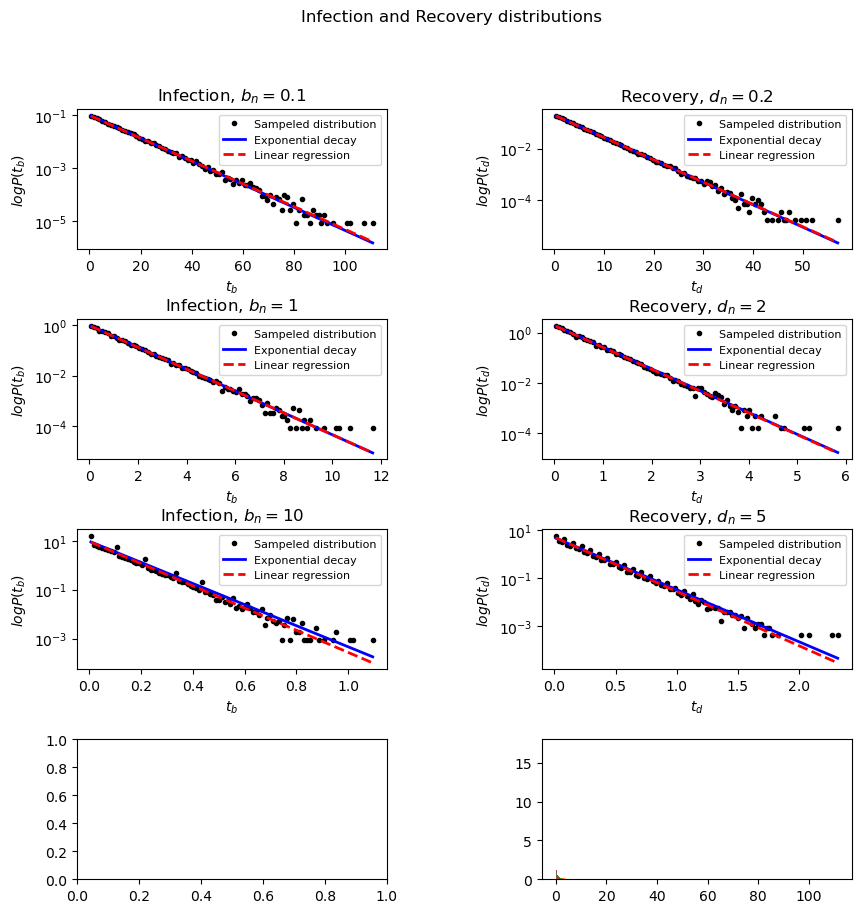

In [115]:
for i, bd in enumerate(bndn):
    b, d = bd
    print(f'Pair: [bn, dn] = [{b}, {d}]')
    print(f' - Mean infection time: {np.mean(tb[i]):.2f}')
    print(f' - Mean recovery time: {np.mean(td[i]):.2f}\n')


fig, axs = plt.subplots(4, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Infection and Recovery distributions')
for i, bd in enumerate(bndn):
    b, d = bd

    # Plot Infection
    tbPlot = np.array(tb[i])
    tbHist = plt.hist(tbPlot, bins=100, density=True)
    tbShift = (tbHist[1][1] - tbHist[1][0])/2
    tbList = np.zeros_like(tbHist[0])
    for j in range(len(tbHist[1])-1):
        tbList[j] = (tbHist[1][j] + tbShift)
    btList = b*np.exp(-b*tbList)
    coefficient = np.polyfit(tbList[0:60], np.log(tbHist[0][0:60]), 1)
    polyb = np.poly1d(coefficient)
    linear = np.exp(coefficient[1])*np.exp(coefficient[0]*tbList)

    axs[i, 0].plot(tbList, tbHist[0], '.',color='black', label=f'Sampeled distribution')
    axs[i, 0].plot(tbList, btList, '-', color='blue', lw=2, label=f'Exponential decay')
    axs[i, 0].plot(tbList, linear, '--', color='red', lw=2, label=f'Linear regression')
    axs[i, 0].set_yscale('log')
    axs[i, 0].set_title(f'Infection, $b_n = {b}$')
    axs[i, 0].set_xlabel('$t_b$')
    axs[i, 0].set_ylabel('$log P(t_b)$')
    axs[i, 0].legend(loc='upper right', prop={'size': 8})

    # Plot Recovery
    tdPlot = np.array(td[i])
    tdHist = plt.hist(tdPlot, bins=100, density=True)
    tdShift = (tdHist[1][1] - tdHist[1][0])/2
    tdList = np.zeros_like(tdHist[0])
    for j in range(len(tdHist[1])-1):
        tdList[j] = (tdHist[1][j] + tdShift)
    dtList = d*np.exp(-d*tdList)
    coefficient = np.polyfit(tdList[0:60], np.log(tdHist[0][0:60]), 1)
    linear = np.exp(coefficient[1])*np.exp(coefficient[0]*tdList)

    axs[i, 1].plot(tdList, tdHist[0], '.',color='black', label=f'Sampeled distribution')
    axs[i, 1].plot(tdList, dtList, '-', color='blue', lw=2, label=f'Exponential decay')
    axs[i, 1].plot(tdList, linear, '--', color='red', lw=2, label=f'Linear regression')
    axs[i, 1].set_yscale('log')
    axs[i, 1].set_title(f'Recovery, $d_n = {d}$')
    axs[i, 1].set_xlabel('$t_d$')
    axs[i, 1].set_ylabel('$log P(t_d)$')
    axs[i, 1].legend(loc='upper right', prop={'size': 8})

The figures above show the probability distributions, $log(P(t_b))$ (on the left) and $log(P(t_b))$ (on the right) as a function of time $t_{b/d}$ on the x-axis. The time is iterated through with $dt = 0.01$ and resets to the next sample when an event occurs. The event takes place if the condition $r < (b/d)_n dt$ where r is a random number in a uniform distribution (0,1).

In all figures we see the sampled distribution follow the analytical exponential probability distribution $(\lambda e^{-\lambda t}), \lambda = rate$ (blue) and with the fitted regression line (red). Based on the figures we can verify that the distributions decays with the exponent $-\lambda t$. There are some deviations at large t which is caused by too few samples and could be alleviated by running more iterations.

The fourth row of plots is there because of a bug when plotting in the last window and ruining the last recovery plot if not included.

In the tables below we can compare the numerically found infection and recovery times compared to their analytical average.

##### Table 1:
Average time until first infection for the investigated infection rates $b_n$ found after $10^5$ iterations
| Infection rate | Analytical $(\frac{1}{b_n})$ | Numerically found $b_n$ |
|----------------|----------|----------|
|      0.1       | 10    | 10.01    |
|       1        | 1    | 0.99    |
|      10        | 0.1    | 0.09    |



##### Table 2:
Average time until first infection for the investigated recovery rates $d_n$ found after $10^5$ iterations
| Recovery rate | Analytical $(\frac{1}{d_n})$ | Numerically found $d_n$ |
|----------------|----------|----------|
|      0.2       | 5    | 5.01    |
|       2        | 0.5    | 0.49    |
|       5        | 0.2    | 0.19    |
